In [1]:
%pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

In [3]:
import pathlib

data_dir = pathlib.Path("E:/tcc/base1/data/")

image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

726


In [4]:
batch_size = 32
img_height = 2500
img_width = 2500

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1452 files belonging to 4 classes.
Using 1162 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1452 files belonging to 4 classes.
Using 290 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['apnea', 'normal', 'test', 'train']


In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
from keras import layers


num_classes = len(class_names)

model = keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
37/37 [==============================] - 10s 263ms/step - loss: 1.6655 - accuracy: 0.3701 - val_loss: 1.3045 - val_accuracy: 0.3966
Epoch 2/10
37/37 [==============================] - 9s 242ms/step - loss: 1.2972 - accuracy: 0.3941 - val_loss: 1.3005 - val_accuracy: 0.3966
Epoch 3/10
37/37 [==============================] - 9s 238ms/step - loss: 1.2922 - accuracy: 0.4002 - val_loss: 1.3006 - val_accuracy: 0.3966
Epoch 4/10
37/37 [==============================] - 9s 241ms/step - loss: 1.2755 - accuracy: 0.3993 - val_loss: 1.2970 - val_accuracy: 0.3966
Epoch 5/10
37/37 [==============================] - 9s 240ms/step - loss: 1.2588 - accuracy: 0.3924 - val_loss: 1.2922 - val_accuracy: 0.3931
Epoch 6/10
37/37 [==============================] - 9s 243ms/step - loss: 1.2540 - accuracy: 0.4191 - val_loss: 1.3047 - val_accuracy: 0.3966
Epoch 7/10
37/37 [==============================] - 9s 245ms/step - loss: 1.2313 - accuracy: 0.4225 - val_loss: 1.3040 - val_accuracy: 0.3517
Epoch

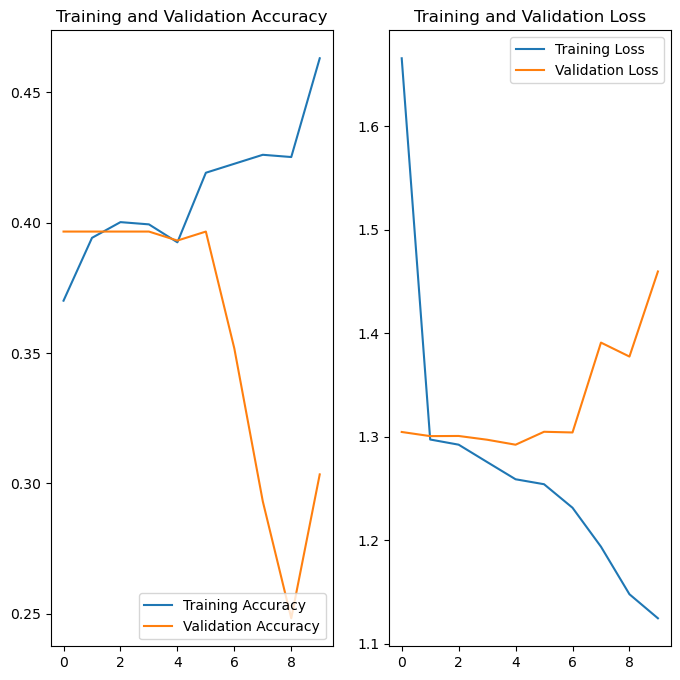

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()